In [1]:
import cv2
import matplotlib.pyplot as plt

In [2]:
config_file = "ssd_mobilenet_v3_large_coco_2020_01_14.pbtxt"
frozen_model = "frozen_inference_graph.pb"

In [3]:
model = cv2.dnn_DetectionModel(frozen_model, config_file)

In [4]:
classlabels = []
file_name = "labels.txt"
with open(file_name, 'rt') as f:
    classlabels = f.read().rstrip('\n').split('\n')

In [5]:
print(len(classlabels), classlabels)

80 ['person', 'bicycle', 'car', 'motorbike', 'aeroplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'sofa', 'pottedplant', 'bed', 'diningtable', 'toilet', 'tvmonitor', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']


In [6]:
model.setInputSize(320,320)
model.setInputScale(1.0/127.5)
model.setInputMean((127.5,127.5,127.5))
model.setInputSwapRB(True)

< cv2.dnn.Model 00000224E2E735D0>

In [7]:
img = cv2.imread('sample.jpg')

In [8]:
ClassIndex, confidence, bbox = model.detect(img, confThreshold=0.5)

In [9]:
print(ClassIndex)

[3 1]


In [10]:
fontScale = 1
font = cv2.FONT_HERSHEY_PLAIN
for classInd, conf, box in zip(ClassIndex.flatten(), confidence.flatten(), bbox):
    cv2.rectangle(img, box, (255,0,0), 2)
    print(box)
    cv2.putText(img, classlabels[classInd - 1], (box[0] + box[2], box[1] + box[3]), font, fontScale=fontScale, color=(0,255,0), thickness=1)

[208  90 150 100]
[200  96  53  79]


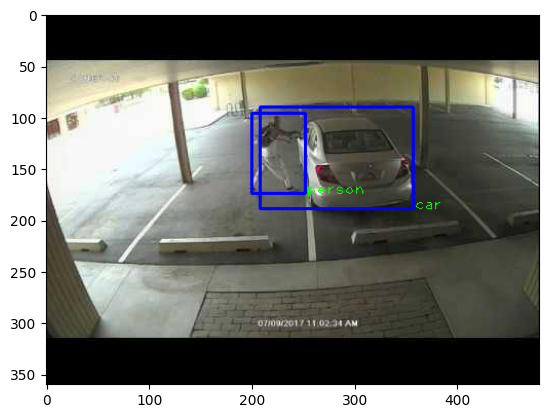

In [11]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))